# **Sentiment Analysis dari Review terhadap Barang yang dibeli melalui Online Shop di Lazada**

# **Persiapan**
Menghilangkan notifikasi warning yang mungkin  muncul saat run kode dan mencari lokasi untuk meletakkan file

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'/content'

Membuka data dari file yg telah di download

In [ ]:
import pandas as pd
df = pd.read_csv('20191002-reviews.csv') 
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


Melihat info data yang meliputi banyaknya data tak kosong pada tiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


Mengambil data dari kolom yang dibutuhkan dan menjadikannya data baru

In [ ]:
df_baru=df.copy()
df_baru.drop(df_baru.columns[[0,1,2,4,5,7,8,9,10,11,12,13,14]],axis=1,inplace=True)
df_baru.head()

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN


# **Data Preprocessing**
Menghapus data kosong pada kolom review 

In [ ]:
df_baru.dropna(subset=['reviewContent'],inplace=True)
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107029 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating         107029 non-null  int64 
 1   reviewContent  107029 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Mengecek data review yang terduplikasi

In [ ]:
df_baru.duplicated().sum()

68688

Menghapus data review yang terduplikasi

In [ ]:
df_baru.drop_duplicates(inplace=True)
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38341 entries, 0 to 199781
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         38341 non-null  int64 
 1   reviewContent  38341 non-null  object
dtypes: int64(1), object(1)
memory usage: 898.6+ KB


Mengecek data reiew yang kosong

In [ ]:
df_baru.isnull().sum() 

rating           0
reviewContent    0
dtype: int64

Membersihkan data review meliputi:<br>
<ol>
<li>Menghilangkan emoji<br></li>
<li>Menghilangkan whitespace (ruang kosong)<br></li>
<li>Menghilangkan emoji<br></li>
<li>Menghilangkan tag html<br></li>
<li>Menghilangkan url<br></li>
<li>Menghilangkan angka<br></li>
<li>Menghilangkan tanda baca<br></li>
<li>Menghilangkan stopword<br></li>
<li>Mengganti kata yang mengandung pemanjangan<br></li>
<li>Mengganti kata slang<br></li>
</ol>

In [ ]:
import re
import string
import unicodedata
from tqdm.notebook import tqdm
from indoNLP.preprocessing import *
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
STEMMER = StemmerFactory().create_stemmer()
def preprocessing(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text, flags=re.UNICODE)  # menghilangkan whitespace (ruang kosong)
    text = emoji_to_words(text)  # menghilangkan emoji
    text = unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii")
    text = remove_html(text)  # menghilangkan tag html
    text = remove_url(text)  # menghilangkan url 
    text = text.translate(str.maketrans(string.digits, " " * len(string.digits)))  # menghilangkan angka
    text = text.translate(str.maketrans(string.punctuation, " " * len(string.punctuation)))  # menghilangkan tanda baca
    text = remove_stopwords(text)  # menghapus stopwords
    text = replace_word_elongation(text)  # mengganti kata yg mengandung pemanjangan
    text = replace_slang(text)  # mengganti kata slang
    text = " ".join(text.split())
    text = STEMMER.stem(text)
    return " ".join(text.split())
df_baru["reviewClean"] = [preprocessing(x) for x in tqdm(df_baru["reviewContent"].values)]
df_baru.reviewClean.head()

  0%|          | 0/38341 [00:00<?, ?it/s]

0    bagus mantap deh sesui pesan
1               bagus sesuai foto
2           ok mantaaaaaaap goood
3                    bagus sesuai
7                            bima
Name: reviewClean, dtype: object

Mendefinisikan review dengan rating 5 sebagai sentimen positif dan selainnya sebagai sentimen negatif

In [ ]:
def sentiment(int):
    if (int == 5):
        return 1
    else:
        return 0
df_baru["sentiment"] = df_baru.rating.apply(lambda x:sentiment(x))
df_baru.head()

,rating,reviewContent,reviewClean,sentiment
0,5,bagus mantap dah sesui pesanan,bagus mantap deh sesui pesan,1
1,4,"Bagus, sesuai foto",bagus sesuai foto,0
2,5,okkkkk mantaaaaaaapppp ... goood,ok mantaaaaaaap goood,1
3,4,bagus sesuai,bagus sesuai,0
7,1,bima,bima,0


Mengecek sebaran setiment positif dan negatif

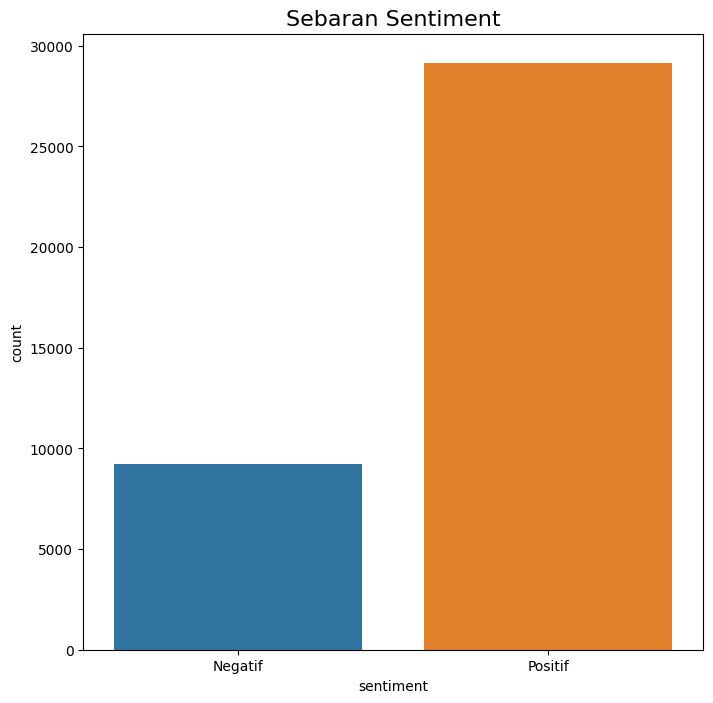

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.countplot(data=df_baru, x="sentiment")
plt.title("Sebaran Sentiment", fontsize=16)
plt.xticks([0, 1], ["Negatif", "Positif"])
plt.show()

Membuat word cloud dari review dengan sentiment positif 

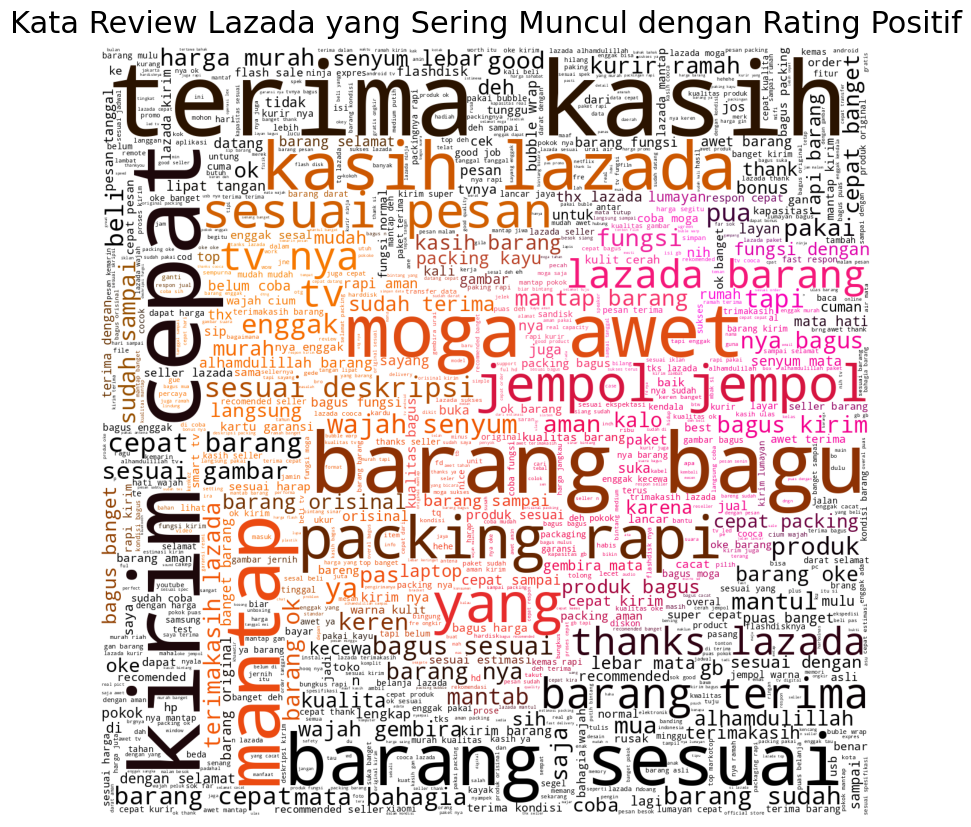

In [ ]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import numpy as np
lazada_mask=np.array(Image.open('lazada.png'))
colormap=ImageColorGenerator(lazada_mask)
wc=WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    max_words=1000,
    mask=lazada_mask,
)
wc.generate(' '.join(text for text in df_baru.loc[df_baru.sentiment == 1, 'reviewClean']))
wc.recolor(color_func=colormap)
plt.figure(figsize=(10,10))
plt.title('Kata Review Lazada yang Sering Muncul dengan Rating Positif',
          fontdict={'size':22,'verticalalignment':'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

Membuat word cloud dari review dengan sentiment negatif

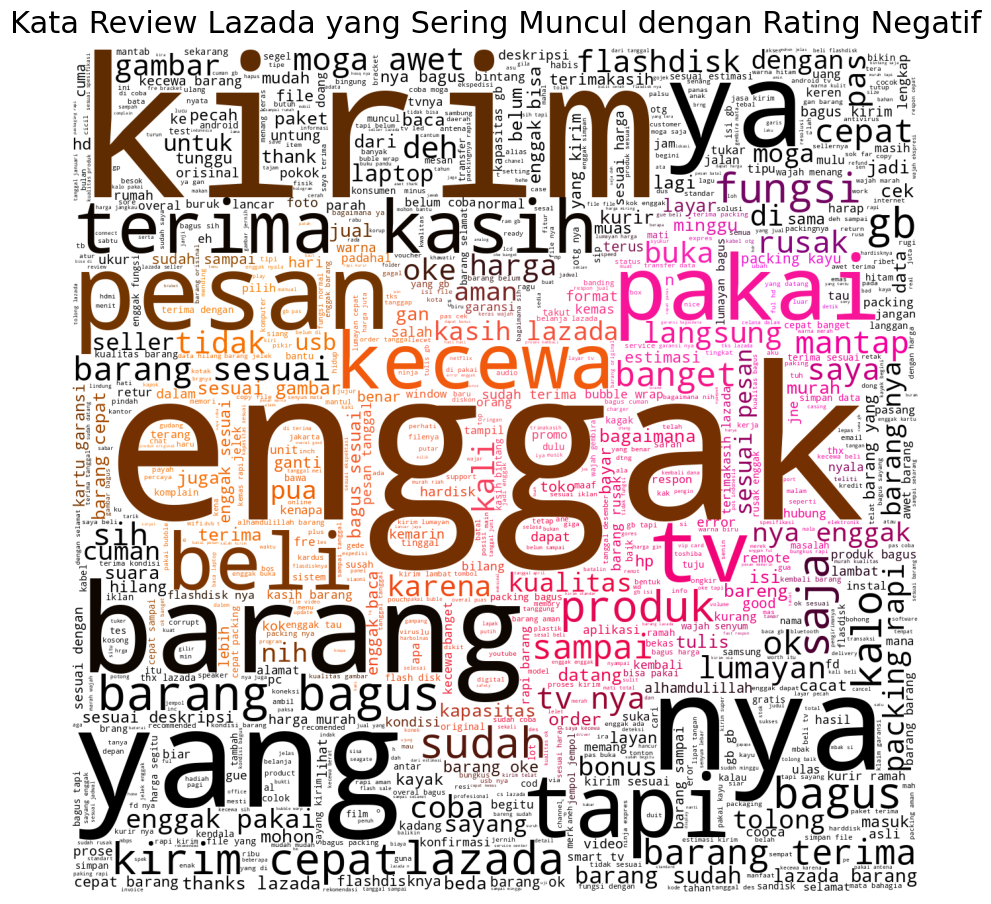

In [ ]:
wc.generate(' '.join(text for text in df_baru.loc[df_baru.sentiment == 0, 'reviewClean']))
wc.recolor(color_func=colormap)
plt.figure(figsize=(11,11))
plt.title('Kata Review Lazada yang Sering Muncul dengan Rating Negatif',
          fontdict={'size':22,'verticalalignment':'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

# **Deep Learning**
Mempelajari dan memodelkan untuk mengetahui keakuratan data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df_baru.reviewClean,df_baru.sentiment,test_size = 0.2 , random_state = 0)

In [ ]:
positif = x_train[y_train[y_train == 1].index]
negatif = x_train[y_train[y_train == 0].index]
x_train.shape,positif.shape,negatif.shape

((30672,), (23279,), (7393,))

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1)
cv_train_reviews=cv.fit_transform(x_train).toarray()
cv_test_reviews=cv.transform(x_test).toarray()

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (30672, 7340)
BOW_cv_test: (7669, 7340)


In [ ]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True)
tv_train_reviews=tv.fit_transform(x_train).toarray()
tv_test_reviews=tv.transform(x_test).toarray()
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (30672, 7340)
Tfidf_test: (7669, 7340)


Mengecek akurasi rata-rata pada masing-masing metode untuk menentukan metode yang akan digunakan untuk menganalisa

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
CV = StratifiedKFold(shuffle=True,random_state=0)

classifiers = {
    "Decision Tree Classifier ": DecisionTreeClassifier(random_state=0),
    "Logistic Regression      ": LogisticRegression(random_state=0),
    "Random Forest Classifier ": RandomForestClassifier(random_state=0),
    "SVM                      ": SVC(kernel="linear", probability=True,random_state=0),
}

for name, clf in classifiers.items():
    pipe = Pipeline([("tf-idf", TfidfVectorizer()), ("clf", clf)])
    scores = cross_val_score(pipe, df_baru["reviewClean"].values, df_baru["sentiment"].values, cv=CV)
    print(f"Rata - rata akurasi dari {name} : {scores.mean():.4f} - std : {scores.std():.4f}")

Rata - rata akurasi dari Decision Tree Classifier  : 0.7441 - std : 0.0030
Rata - rata akurasi dari Logistic Regression       : 0.8171 - std : 0.0037
Rata - rata akurasi dari Random Forest Classifier  : 0.8109 - std : 0.0036
Rata - rata akurasi dari SVM                       : 0.8125 - std : 0.0042


Melakukan hyperparameter tuning untuk menentukan kombinasi analisa terbaik

In [ ]:
import numpy as np

param_grid = {
    'penalty' : ['l1','l2'],
    'C'       : np.arange(0.1,1.5,0.1),
    'solver'  : ['liblinear','saga'],
    'max_iter': [100,500,1000,2000]
}

search = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=5)
search.fit(tv.fit_transform(x_train), y_train)
search_df = pd.DataFrame(search.cv_results_)

(
    search_df.sort_values(["rank_test_score", "std_test_score"])
    .drop(
        [
            "mean_fit_time",
            "std_fit_time",
            "mean_score_time",
            "std_score_time",
            "split0_test_score",
            "split1_test_score",
            "split2_test_score",
            "split3_test_score",
            "split4_test_score",
        ],
        axis=1,
    )
    .head(20)
)

,param_C,param_max_iter,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score
0,0.1,100,l1,liblinear,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', '...",0.758966,0.000069,1
1,0.1,100,l1,saga,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', '...",0.758966,0.000069,1
2,0.1,100,l2,liblinear,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...",0.758966,0.000069,1
3,0.1,100,l2,saga,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...",0.758966,0.000069,1
4,0.1,500,l1,liblinear,"{'C': 0.1, 'max_iter': 500, 'penalty': 'l1', '...",0.758966,0.000069,1
5,0.1,500,l1,saga,"{'C': 0.1, 'max_iter': 500, 'penalty': 'l1', '...",0.758966,0.000069,1
6,0.1,500,l2,liblinear,"{'C': 0.1, 'max_iter': 500, 'penalty': 'l2', '...",0.758966,0.000069,1
7,0.1,500,l2,saga,"{'C': 0.1, 'max_iter': 500, 'penalty': 'l2', '...",0.758966,0.000069,1
8,0.1,1000,l1,liblinear,"{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', ...",0.758966,0.000069,1
9,0.1,1000,l1,saga,"{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', ...",0.758966,0.000069,1


In [ ]:
lr=LogisticRegression(penalty='l1',max_iter=100,C=0.1,solver='liblinear',random_state=0)
#Fitting model untuk bag of word
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting model untuk tfidf
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')
LogisticRegression(C=0.1, penalty='l1', random_state=0, solver='liblinear')


In [ ]:
#Memprediksi model untuk bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
##Memprediksi model untuk tfidf
lr_tfidf_predict=lr.predict(tv_test_reviews)

In [ ]:
#Skor akurasi untuk bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Skor akurasi untuk tfidf
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.76424566436302
lr_tfidf_score : 0.76424566436302


In [ ]:
#Report klasifikasi untuk bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['0','1'])
print(lr_bow_report)

#Report klasifikasi untuk tfidf
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['0','1'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1808
           1       0.76      1.00      0.87      5861

    accuracy                           0.76      7669
   macro avg       0.38      0.50      0.43      7669
weighted avg       0.58      0.76      0.66      7669

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1808
           1       0.76      1.00      0.87      5861

    accuracy                           0.76      7669
   macro avg       0.38      0.50      0.43      7669
weighted avg       0.58      0.76      0.66      7669



In [ ]:
import keras
from keras.layers import Dense,LSTM
from keras.models import Sequential
model = Sequential()
model.add(Dense(units = 75 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu')) 
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                550575    
                                                                 
 dense_1 (Dense)             (None, 50)                3800      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 555,921
Trainable params: 555,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(cv_train_reviews,y_train, epochs = 10)

Epoch 1/10
959/959 [==============================] - 22s 19ms/step - loss: 0.5571 - accuracy: 0.7585
Epoch 2/10
959/959 [==============================] - 11s 12ms/step - loss: 0.4640 - accuracy: 0.8098
Epoch 3/10
959/959 [==============================] - 10s 10ms/step - loss: 0.4455 - accuracy: 0.8136
Epoch 4/10
959/959 [==============================] - 10s 10ms/step - loss: 0.4440 - accuracy: 0.8136
Epoch 5/10
959/959 [==============================] - 10s 11ms/step - loss: 0.4434 - accuracy: 0.8136
Epoch 6/10
959/959 [==============================] - 10s 11ms/step - loss: 0.4429 - accuracy: 0.8136
Epoch 7/10
959/959 [==============================] - 10s 11ms/step - loss: 0.4432 - accuracy: 0.8136
Epoch 8/10
959/959 [==============================] - 9s 10ms/step - loss: 0.4429 - accuracy: 0.8136
Epoch 9/10
959/959 [==============================] - 11s 11ms/step - loss: 0.4427 - accuracy: 0.8136
Epoch 10/10
959/959 [==============================] - 10s 11ms/step - loss: 0.4427

In [ ]:
model.evaluate(cv_train_reviews,y_train)[1]

959/959 [==============================] - 5s 5ms/step - loss: 0.4421 - accuracy: 0.8136


0.8135759234428406

In [ ]:
model.add(Dense(units = 75, activation = 'relu', input_dim = tv_train_reviews.shape[1]))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 25, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                550575    
                                                                 
 dense_1 (Dense)             (None, 50)                3800      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
 dense_5 (Dense)             (None, 75)                150       
                                                                 
 dense_6 (Dense)             (None, 50)                3

In [ ]:
model.fit(tv_train_reviews, y_train, epochs = 10)

Epoch 1/10
959/959 [==============================] - 13s 12ms/step - loss: 0.4893 - accuracy: 0.8039
Epoch 2/10
959/959 [==============================] - 13s 14ms/step - loss: 0.4706 - accuracy: 0.8134
Epoch 3/10
959/959 [==============================] - 16s 16ms/step - loss: 0.4703 - accuracy: 0.8136
Epoch 4/10
959/959 [==============================] - 17s 18ms/step - loss: 0.4700 - accuracy: 0.8136
Epoch 5/10
959/959 [==============================] - 12s 13ms/step - loss: 0.4703 - accuracy: 0.8136
Epoch 6/10
959/959 [==============================] - 11s 12ms/step - loss: 0.4701 - accuracy: 0.8136
Epoch 7/10
959/959 [==============================] - 12s 12ms/step - loss: 0.4702 - accuracy: 0.8136
Epoch 8/10
959/959 [==============================] - 10s 11ms/step - loss: 0.4701 - accuracy: 0.8135
Epoch 9/10
959/959 [==============================] - 9s 9ms/step - loss: 0.4699 - accuracy: 0.8136
Epoch 10/10
959/959 [==============================] - 10s 11ms/step - loss: 0.4555 

In [ ]:
model.evaluate(tv_train_reviews, y_train)[1]

959/959 [==============================] - 4s 4ms/step - loss: 0.4448 - accuracy: 0.8136


0.8135759234428406